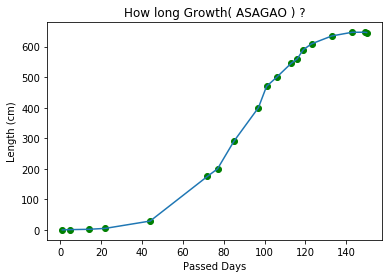

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style

x,y = np.loadtxt('asagao.csv', unpack= True, delimiter=',', skiprows=1)

plt.plot(x, y, 'go')
plt.plot(x,y)

plt.title('How long Growth( ASAGAO ) ?')
plt.ylabel('Length (cm)')
plt.xlabel('Passed Days')

plt.show()

In [35]:
import pandas as pd

dataset = pd.read_csv('asagao.csv')
x = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values

print(type(x))
print(x)
print(y)

<class 'numpy.ndarray'>
[[  1]
 [  5]
 [ 14]
 [ 22]
 [ 44]
 [ 72]
 [ 77]
 [ 85]
 [ 97]
 [101]
 [106]
 [113]
 [116]
 [119]
 [123]
 [133]
 [143]
 [149]
 [150]]
[  0   1   2   5  29 175 200 290 400 470 500 545 560 590 609 635 647 647
 646]


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print(x_train)
print(x_test)


[[ 77]
 [ 44]
 [ 14]
 [ 72]
 [119]
 [101]
 [ 85]
 [149]
 [113]
 [ 22]
 [  1]
 [133]
 [116]]
[[106]
 [  5]
 [ 97]
 [150]
 [123]
 [143]]


In [37]:
x_train=np.sort(x_train, axis=0)
y_train.sort()
x_test=np.sort(x_test, axis=0)
y_test.sort()
print(x_train)
print(x_test)

[[  1]
 [ 14]
 [ 22]
 [ 44]
 [ 72]
 [ 77]
 [ 85]
 [101]
 [113]
 [116]
 [119]
 [133]
 [149]]
[[  5]
 [ 97]
 [106]
 [123]
 [143]
 [150]]


In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 6)

print(poly_reg)

x_poly = poly_reg.fit_transform(x_train)

print(type(x_poly))
print(x_poly)

poly_reg.fit(x_poly, y_train)

PolynomialFeatures(degree=6, include_bias=True, interaction_only=False,
                   order='C')
<class 'numpy.ndarray'>
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.40000000e+01 1.96000000e+02 2.74400000e+03
  3.84160000e+04 5.37824000e+05 7.52953600e+06]
 [1.00000000e+00 2.20000000e+01 4.84000000e+02 1.06480000e+04
  2.34256000e+05 5.15363200e+06 1.13379904e+08]
 [1.00000000e+00 4.40000000e+01 1.93600000e+03 8.51840000e+04
  3.74809600e+06 1.64916224e+08 7.25631386e+09]
 [1.00000000e+00 7.20000000e+01 5.18400000e+03 3.73248000e+05
  2.68738560e+07 1.93491763e+09 1.39314070e+11]
 [1.00000000e+00 7.70000000e+01 5.92900000e+03 4.56533000e+05
  3.51530410e+07 2.70678416e+09 2.08422380e+11]
 [1.00000000e+00 8.50000000e+01 7.22500000e+03 6.14125000e+05
  5.22006250e+07 4.43705312e+09 3.77149516e+11]
 [1.00000000e+00 1.01000000e+02 1.02010000e+04 1.03030100e+06
  1.04060401e+08 1.05101005e+10 1.06152015

PolynomialFeatures(degree=6, include_bias=True, interaction_only=False,
                   order='C')

In [39]:
test_data = 50
x_poly2 = poly_reg.fit_transform([[test_data]])
print(x_poly2)
#print(poly_reg.predict(x_poly2)) 

[[1.0000e+00 5.0000e+01 2.5000e+03 1.2500e+05 6.2500e+06 3.1250e+08
  1.5625e+10]]


In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)

print(lin_reg.predict(x_poly2)) #50日目の予測長さ

[42.963867]


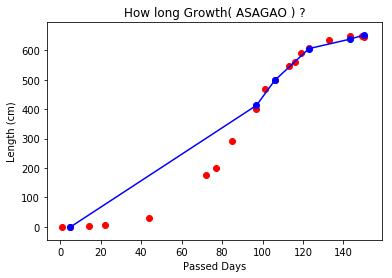

In [41]:
plt.scatter(x, y, color = 'red')
plt.plot(x_test, lin_reg.predict(poly_reg.fit_transform(x_test)), color = 'blue')
plt.scatter(x_test, lin_reg.predict(poly_reg.fit_transform(x_test)), color = 'blue')
plt.title('How long Growth( ASAGAO ) ?')
plt.ylabel('Length (cm)')
plt.xlabel('Passed Days')
plt.show()

In [42]:
x_test

array([[  5],
       [ 97],
       [106],
       [123],
       [143],
       [150]])

In [43]:
x_grid = np.arange(min(x_test), max(x_test), 0.1)
print(x_grid)
x_grid1 = x_grid.reshape((len(x_grid), 1))
print(x_grid1)

[  5.    5.1   5.2 ... 149.7 149.8 149.9]
[[  5. ]
 [  5.1]
 [  5.2]
 ...
 [149.7]
 [149.8]
 [149.9]]


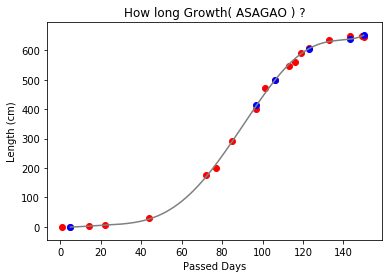

In [44]:
plt.scatter(x, y, color = 'red')
plt.scatter(x_test, lin_reg.predict(poly_reg.fit_transform(x_test)), color = 'blue') # x_train に対する予測結果
plt.plot(x_grid1, lin_reg.predict(poly_reg.fit_transform(x_grid1)), color = 'gray') # 増産した x_train に対する予測結果
#plt.scatter(x_grid1, lin_reg.predict(poly_reg.fit_transform(x_grid1)), color = 'gray')

plt.title('How long Growth( ASAGAO ) ?')
plt.ylabel('Length (cm)')
plt.xlabel('Passed Days')
plt.show()

In [45]:
import pickle

y_pred = lin_reg.predict(poly_reg.fit_transform(x_grid1))
pickle.dump(lin_reg, open('model3.pkl','wb'))


In [46]:
model = pickle.load(open('model3.pkl','rb'))
test_data2 = poly_reg.fit_transform([[50]])
print(model.predict(test_data2))

[42.963867]
